In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict

In [2]:
experiment_folder = "/home/kenzo/experiments/resnext50/"

# Loss final de cada fold

In [3]:
summarized_fold_info_df = pd.read_csv(experiment_folder + "summarized_fold_info.csv")
summarized_fold_info_df.set_index("fold", inplace=True)


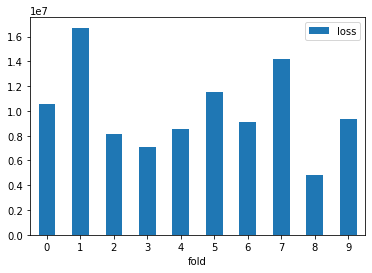

In [4]:
summarized_fold_info_df.plot.bar(rot=0)

# Predições

In [5]:
predictions_df = pd.read_csv(experiment_folder + "predictions.csv")
predictions_df.head()

,test_index,prediction
0,84,2514.979736
1,52,3163.927490
2,192,2105.574219
3,189,2373.833496
4,223,4052.242432


# Análise dos folds

In [6]:
raw_fold_info_df = pd.read_csv(experiment_folder + "raw_fold_info.csv")
raw_fold_info_df.head()

,fold,epoch,train_loss,validation_loss
0,0,0,4.261413e+07,35809468.6
1,0,1,3.985783e+07,28976478.4
2,0,2,3.793128e+07,30690005.2
3,0,3,3.402854e+07,24719523.2
4,0,4,3.077963e+07,22629800.5


## Loss média de cada época do k-fold

In [7]:
def get_avg_validation_loss(raw_fold_info_df: pd.DataFrame) -> pd.DataFrame:
    
    new_df = raw_fold_info_df[["epoch", "train_loss", "validation_loss"]].groupby("epoch").sum()
    new_df["train_loss"] /= len(raw_fold_info_df["epoch"].unique())
    new_df["validation_loss"] /= len(raw_fold_info_df["epoch"].unique())

    return new_df

In [8]:
teste = get_avg_validation_loss(raw_fold_info_df)

In [9]:
teste.reset_index()

,epoch,train_loss,validation_loss
0,0,4.281252e+07,4.145012e+07
1,1,4.019705e+07,3.569992e+07
2,2,3.737699e+07,3.296172e+07
3,3,3.401341e+07,2.963234e+07
4,4,3.032928e+07,2.596855e+07
5,5,2.681958e+07,2.210037e+07
6,6,2.339018e+07,2.066187e+07
7,7,1.940880e+07,1.613964e+07
8,8,1.600211e+07,1.120732e+07
9,9,1.273776e+07,9.991894e+06


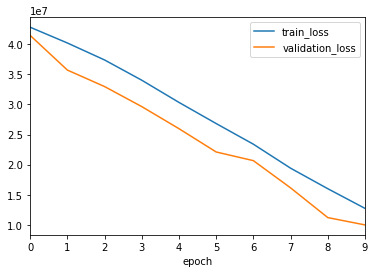

In [10]:
teste.plot()

## Analisando um fold em específico

In [11]:
fold = 1

In [12]:
fold_df = raw_fold_info_df[raw_fold_info_df["fold"] == fold]
fold_df.drop(columns="fold", inplace=True)
fold_df.set_index("epoch", inplace=True)
fold_df.head()

,train_loss,validation_loss
epoch,,
0,4.229543e+07,48661647.2
1,3.934094e+07,40976697.6
2,3.680195e+07,41757460.0
3,3.308926e+07,34434146.0
4,2.980734e+07,33898677.6


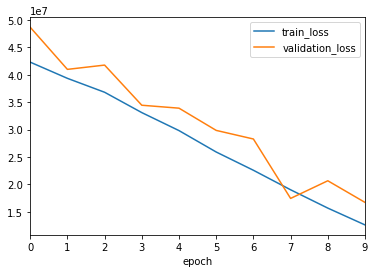

In [13]:
fold_df.plot()

# Comparando todos os experimentos

In [14]:
experiment_folder = "/home/kenzo/experiments/"

In [15]:
def get_all_experiments_avg_validation_loss(experiment_folder: str, show_model_names: bool = True):

    experiments_df = pd.DataFrame(columns=["epoch", "train_loss", "validation_loss", "model"])

    for experiment in os.listdir(experiment_folder):
        for root, dirs, files in os.walk(experiment_folder+experiment):
            for file_name in files:

                if "raw_fold_info.csv" in file_name:

                    raw_info_df = pd.read_csv(os.path.join(experiment_folder, experiment, file_name))
                    experiment_avg_loss = get_avg_validation_loss(raw_info_df).reset_index()
                    experiment_avg_loss["model"] = experiment

                    experiments_df = experiments_df.append(experiment_avg_loss, ignore_index=True)

    models = experiments_df["model"].unique()
    models.sort()
    aliases = {name: f"#{i}" for i, name in enumerate(models, start=1)}

    if not show_model_names:
        experiments_df.replace(aliases, inplace=True)
    
    return experiments_df, aliases

In [16]:
df, aliases = get_all_experiments_avg_validation_loss(experiment_folder, show_model_names=False)

In [17]:
aliases

{'resnet18': '#1',
 'resnext101': '#2',
 'resnext50': '#3',
 'resnext50pretrained': '#4'}

In [18]:
df = df[["epoch", "validation_loss", "model"]]
df.set_index("epoch", inplace=True)
df = df.pivot(columns="model")

Text(0.5, 0, 'Epochs')

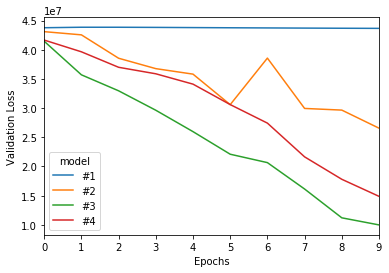

In [19]:
df["validation_loss"].plot()
plt.ylabel("Validation Loss")
plt.xlabel("Epochs")